# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

In [1]:
!pip3 install seaborn

    100% |████████████████████████████████| 163kB 442kB/s ta 0:00:01
    100% |████████████████████████████████| 4.4MB 161kB/s ta 0:00:011
    100% |████████████████████████████████| 16.2MB 33kB/s eta 0:00:01   4% |█▋                              | 808kB 2.6MB/s eta 0:00:07    71% |███████████████████████         | 11.6MB 415kB/s eta 0:00:12    74% |████████████████████████        | 12.1MB 616kB/s eta 0:00:07    79% |█████████████████████████▍      | 12.9MB 663kB/s eta 0:00:06
    100% |████████████████████████████████| 12.8MB 31kB/s eta 0:00:011 3% |█                               | 389kB 731kB/s eta 0:00:17    23% |███████▋                        | 3.0MB 487kB/s eta 0:00:20    84% |███████████████████████████     | 10.8MB 1.5MB/s eta 0:00:02
    100% |████████████████████████████████| 14.8MB 48kB/s eta 0:00:01  9% |███▏                            | 1.4MB 825kB/s eta 0:00:17    13% |████▍                           | 2.0MB 906kB/s eta 0:00:15    59% |███████████████████             | 8

## This cell automatically downloads Capital Bikeshare data

In [2]:
import sys
sys.path.append('..')
from utils.bikeshare import download_bikeshare_data

download_bikeshare_data(2016, 1, '../data/')

Downloading: 2016 Q1 | Extracting... | Created: ../data/2016-Q1-cabi-trip-history-data.csv


### And here we read in the data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('../data/2016-Q1-cabi-trip-history-data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [6]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour_of_day
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,23.98
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,23.95
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,23.95


### Aggregate to get a count per hour/minute of the day across all trips

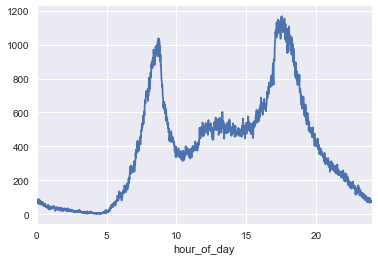

In [5]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()
# import seaborn as sns

# sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

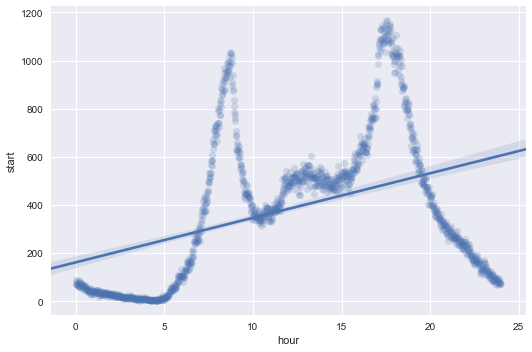

In [7]:
sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend

In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


x = hours[['hour']]
y = hours.start

In [112]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([ 18.51119838]), 161.63029612344491)

Build a predictive model of basic linear regression line of "best fit". This is a repeat of the plot above.

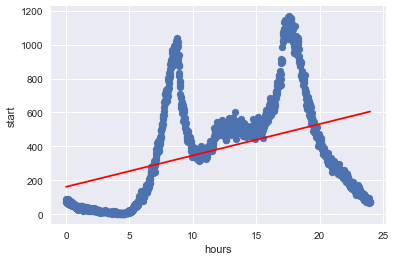

In [111]:
hours['pred'] = linreg.predict(X)

# put the plots together
plt.scatter(hours.hour, hours.start)
plt.plot(hours.hour, hours.pred, color='red')
plt.xlabel('hours')
plt.ylabel('start')




## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

# Model 1 - Polynomial $x^{15}$

In [164]:
from sklearn.preprocessing import PolynomialFeatures
poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x)

In [165]:
linear = linear_model.LinearRegression()

linear.fit(x_15, y)

(linear.coef_, linear.intercept_)



(array([  0.00000000e+00,  -1.96265745e-05,   2.07830052e-07,
          9.14947294e-07,   5.81256565e-06,   3.23921470e-05,
          1.50395200e-04,   5.19089807e-04,   9.68095841e-04,
         -3.93833404e-04,   6.31151141e-05,  -5.47368403e-06,
          2.80553039e-07,  -8.53268253e-09,   1.42876364e-10,
         -1.01742811e-12]), 29.847803489367152)

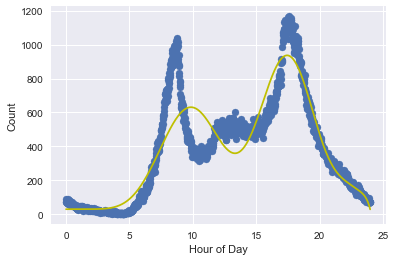

In [166]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='y')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

Observation: This model doesn't seem to fit the data all that well.  Even though it is pretty close as the hours increase, it's not very good overall. Perhaps it is best to take a partial sample of the data and work to find a model that fits. More than likely we'd have to apply two separate polynomial models (for portions of the data before 1200 and those after 1200).  I'd assume there are different patterns for those bikesharing at the start of the workday (around 6am) and at the end of the workday (after 2pm). 

### Repeating Model 1 with a portion of the data. Below models will show riders who use the bike share after 3pm.


In [162]:
partial_hours = hours.loc[15:24]

X = partial_hours[['hour']]
y2 = partial_hours.start

poly15 = PolynomialFeatures(degree=15)

X_15 = poly15.fit_transform(X)

linear = linear_model.LinearRegression()

linear.fit(X_15, y2)

(linear.coef_, linear.intercept_)


(array([  0.00000000e+00,  -2.71465455e-08,  -8.45473658e-10,
         -2.28319877e-09,  -2.91461657e-08,  -3.19236546e-07,
         -2.95982335e-06,  -2.22490536e-05,  -1.22486365e-04,
         -3.70682089e-04,   1.05875852e-04,  -1.22307562e-05,
          7.49869746e-07,  -2.58381679e-08,   4.74828966e-10,
         -3.63621972e-12]), 32206.526219883672)

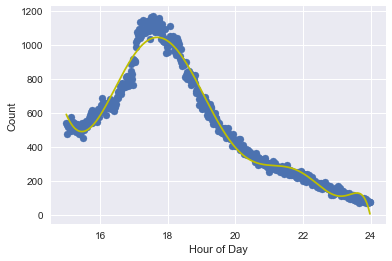

In [163]:
plt.scatter(X,y2)
plt.plot(X, np.dot(X_15, linear.coef_) + linear.intercept_, c='y')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

## Model 2 - Polynomial $x^{20}$ (with a portion of the data)

In [158]:
poly20 = PolynomialFeatures(degree=20)

X_20 = poly20.fit_transform(X)

In [159]:
linear = linear_model.LinearRegression()

linear.fit(X_20, y2)

(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -9.27631777e-13,  -2.76736545e-15,
         -3.69313553e-18,  -2.37708721e-20,  -3.02966200e-19,
         -4.23540605e-18,  -5.49728144e-17,  -6.60572947e-16,
         -7.27558335e-15,  -7.21248279e-14,  -6.24035747e-13,
         -4.46407643e-12,  -2.36954887e-11,  -6.96852092e-11,
          2.08983070e-11,  -2.50955757e-12,   1.58938511e-13,
         -5.63015124e-15,   1.05958695e-16,  -8.28349955e-19]),
 1697.938674488774)

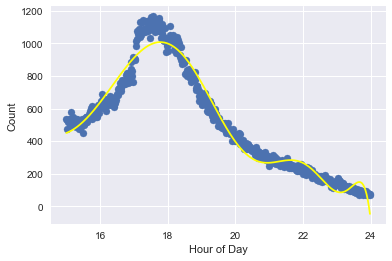

In [160]:
plt.scatter(X,y2)
plt.plot(X, np.dot(X_20, linear.coef_) + linear.intercept_, c='yellow')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

Observation:  The model results are somewhat erratic at the upper end. It appears to be a little bit overfitting in many areas. It seems that it was a better fit with the smaller number.

## Model 3 - Polynomial $x^{17}$ (with a portion of the data)

In [153]:
poly17= PolynomialFeatures(degree=17)

X_17 = poly17.fit_transform(X)

linear = linear_model.LinearRegression()

linear.fit(X_17, y2)

(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -5.97083676e-10,  -3.24682129e-12,
         -7.34020559e-14,  -5.22016173e-13,  -6.78381636e-12,
         -7.88287200e-11,  -8.11638369e-10,  -7.21786350e-09,
         -5.26855416e-08,  -2.83894333e-07,  -8.44965385e-07,
          2.46477595e-07,  -2.89424774e-08,   1.79857438e-09,
         -6.26821012e-11,   1.16315280e-12,  -8.98227679e-15]),
 10560.872848072759)

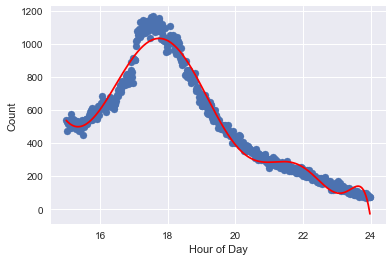

In [156]:
plt.scatter(X,y2)
plt.plot(X, np.dot(X_17, linear.coef_) + linear.intercept_, c='red')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

Observation: This fit a bit better than the $x^{15}$ model. There is slight overfitting as it approaches 17 hours, then slight underfitting approaching 18 hours. 

## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


Choosing $x^{17}$ polynomial model

## Model 1 - Ridge Regression for Polynomial $x^{17}$ model (with a portion of the data)

In [192]:
poly17= PolynomialFeatures(degree=17)

X_17 = poly17.fit_transform(X)

linear = linear_model.LinearRegression()

linear.fit(X_17, y2)

(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -5.97083676e-10,  -3.24682129e-12,
         -7.34020559e-14,  -5.22016173e-13,  -6.78381636e-12,
         -7.88287200e-11,  -8.11638369e-10,  -7.21786350e-09,
         -5.26855416e-08,  -2.83894333e-07,  -8.44965385e-07,
          2.46477595e-07,  -2.89424774e-08,   1.79857438e-09,
         -6.26821012e-11,   1.16315280e-12,  -8.98227679e-15]),
 10560.872848072759)

In [193]:
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(X_17, y2)
(ridge.coef_, ridge.intercept_)

(array([  0.00000000e+00,   1.18317557e-04,   5.28608213e-01,
         -4.19781667e+01,   8.59908107e-01,  -2.42509196e+00,
         -6.14420283e+00,  -5.08490921e+00,   6.40202743e+00,
         -2.04503232e+00,   3.35818241e-01,  -3.38665453e-02,
          2.25308400e-03,  -1.01471618e-04,   3.07712873e-06,
         -6.03997258e-08,   6.94952696e-10,  -3.56697518e-12]),
 25843144.885575809)

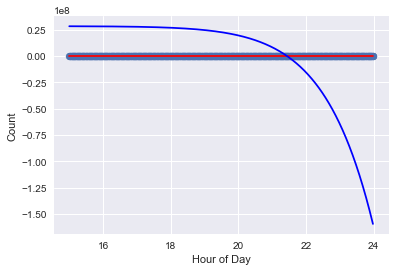

In [194]:
plt.scatter(X,y2)
plt.plot(X, np.dot(X_17, linear.coef_) + linear.intercept_, c='red')
plt.plot(X, np.dot(X_17,ridge.coef_) + ridge.intercept_, c='b')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

## Model 2 - Ridge Regression for Polynomial $x^{17}$ model (with a portion of the data)

In [195]:
poly17= PolynomialFeatures(degree=17)

X_17 = poly17.fit_transform(X)

linear = linear_model.LinearRegression()

linear.fit(X_17, y2)

(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -5.97083676e-10,  -3.24682129e-12,
         -7.34020559e-14,  -5.22016173e-13,  -6.78381636e-12,
         -7.88287200e-11,  -8.11638369e-10,  -7.21786350e-09,
         -5.26855416e-08,  -2.83894333e-07,  -8.44965385e-07,
          2.46477595e-07,  -2.89424774e-08,   1.79857438e-09,
         -6.26821012e-11,   1.16315280e-12,  -8.98227679e-15]),
 10560.872848072759)

In [196]:
ridge2 = linear_model.Ridge(alpha=317)
ridge2.fit(X_17, y2)
(ridge2.coef_, ridge2.intercept_)

(array([  0.00000000e+00,  -1.56985563e-04,  -4.02295786e-01,
         -7.75888123e-02,   6.65118191e-03,   3.49754254e-02,
          2.28739194e-01,   1.01055723e+00,   2.21624135e+00,
         -9.98565827e-01,   1.88449268e-01,  -2.05539981e-02,
          1.43944351e-03,  -6.72533464e-05,   2.09709026e-06,
         -4.20797891e-08,   4.92935634e-10,  -2.56785690e-12]),
 93787.856278935185)

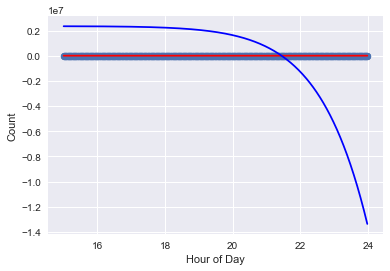

In [197]:
plt.scatter(X,y2)
plt.plot(X, np.dot(X_17, linear.coef_) + linear.intercept_, c='red')
plt.plot(X, np.dot(X_17,ridge2.coef_) + ridge2.intercept_, c='b')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

## Model 3 - Ridge Regression for Polynomial $x^{17}$ model (with a portion of the data)

In [198]:
ridge3 = linear_model.Ridge(alpha=-0.6)
ridge3.fit(X_17, y2)
(ridge3.coef_, ridge3.intercept_)

(array([  0.00000000e+00,   1.71703846e-03,   3.95512678e+00,
          3.52204274e+01,  -7.15314946e-01,   2.09937990e+00,
          5.64930298e+00,   6.78927672e+00,   1.03056568e+00,
         -1.10293347e+00,   2.42848329e-01,  -2.81175423e-02,
          2.02418278e-03,  -9.57977471e-05,   3.00241750e-06,
         -6.02860531e-08,   7.04830379e-10,  -3.65852078e-12]),
 -12551298.471846065)

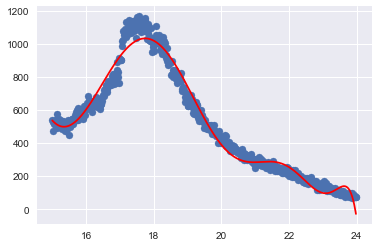

In [199]:
plt.scatter(X,y2)
plt.plot(X, np.dot(X_17, linear.coef_) + linear.intercept_, c='red')

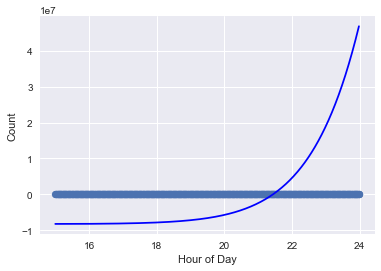

In [200]:
plt.scatter(X,y2)
plt.plot(X, np.dot(X_17,ridge3.coef_) + ridge3.intercept_, c='b')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

Observation: In all of the ridge regression models, regardless of alpha values, it did not fit the data. In fact, the data transformed and all plotted at zero.  